## Assignment 3 Comp 4431

Patrick Sagui


In [46]:
#imports
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import scipy.stats as stats
from statsmodels.stats.anova import anova_lm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D


## Load Dataset

In [47]:
iris = load_iris()

In [48]:
list(iris.target_names)

['setosa', 'versicolor', 'virginica']

In [49]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [50]:
iris_df = pd.DataFrame(iris.data, columns = ['sepal_length','sepal_width', 'petal_length', 'petal_width'])
iris_df['target'] = iris.target
iris_df

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [51]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### setosa

In [52]:
iris_df[iris_df.target==0].describe()

,sepal_length,sepal_width,petal_length,petal_width,target
count,50.00000,50.000000,50.000000,50.000000,50.0
mean,5.00600,3.428000,1.462000,0.246000,0.0
std,0.35249,0.379064,0.173664,0.105386,0.0
min,4.30000,2.300000,1.000000,0.100000,0.0
25%,4.80000,3.200000,1.400000,0.200000,0.0
50%,5.00000,3.400000,1.500000,0.200000,0.0
75%,5.20000,3.675000,1.575000,0.300000,0.0
max,5.80000,4.400000,1.900000,0.600000,0.0


### versicolor

In [53]:
iris_df[iris_df.target==1].describe()

,sepal_length,sepal_width,petal_length,petal_width,target
count,50.000000,50.000000,50.000000,50.000000,50.0
mean,5.936000,2.770000,4.260000,1.326000,1.0
std,0.516171,0.313798,0.469911,0.197753,0.0
min,4.900000,2.000000,3.000000,1.000000,1.0
25%,5.600000,2.525000,4.000000,1.200000,1.0
50%,5.900000,2.800000,4.350000,1.300000,1.0
75%,6.300000,3.000000,4.600000,1.500000,1.0
max,7.000000,3.400000,5.100000,1.800000,1.0


### virginica

In [54]:
iris_df[iris_df.target==2].describe()

,sepal_length,sepal_width,petal_length,petal_width,target
count,50.00000,50.000000,50.000000,50.00000,50.0
mean,6.58800,2.974000,5.552000,2.02600,2.0
std,0.63588,0.322497,0.551895,0.27465,0.0
min,4.90000,2.200000,4.500000,1.40000,2.0
25%,6.22500,2.800000,5.100000,1.80000,2.0
50%,6.50000,3.000000,5.550000,2.00000,2.0
75%,6.90000,3.175000,5.875000,2.30000,2.0
max,7.90000,3.800000,6.900000,2.50000,2.0


In [55]:
iris_df.shape

(150, 5)

In [56]:
iris_df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64

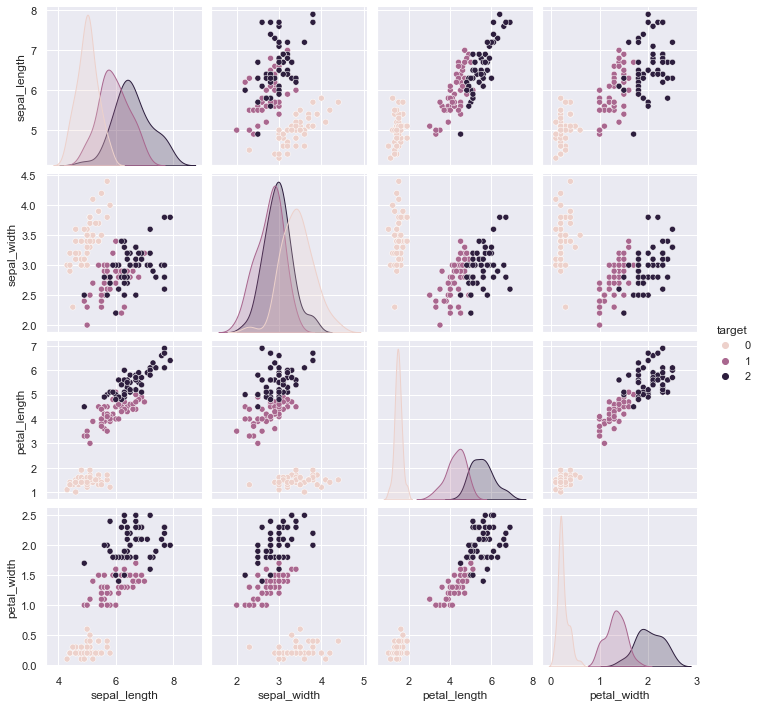

In [57]:
sns.pairplot(iris_df, hue='target')

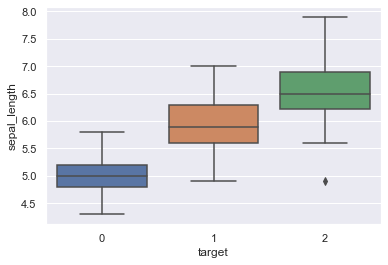

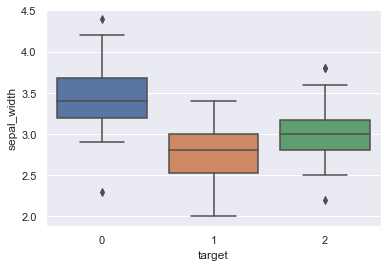

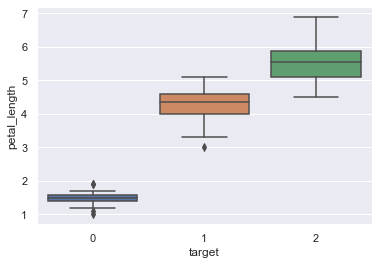

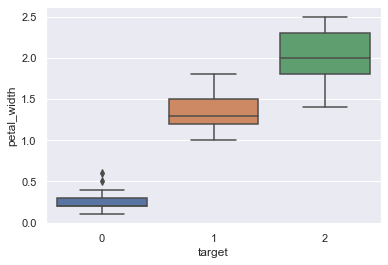

In [74]:
for _y in ['sepal_length','sepal_width', 'petal_length', 'petal_width']:
    g = sns.boxplot(x='target', y=_y, data=iris_df)
    plt.show()

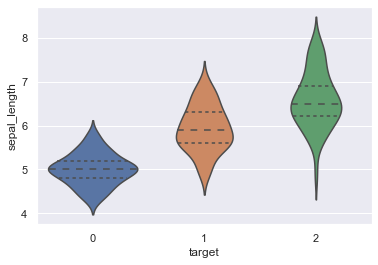

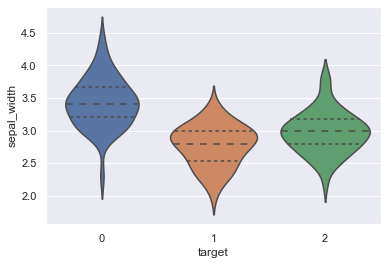

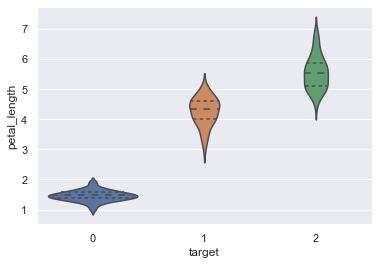

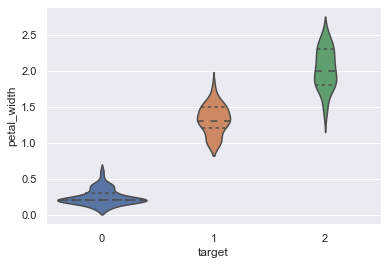

In [58]:
for _y in ['sepal_length','sepal_width', 'petal_length', 'petal_width']:
    g = sns.violinplot(x='target', y=_y, data=iris_df, inner='quartile')
    plt.show()

In [59]:
## TODO ADD BOX WHISKER

## PCA 

In [60]:
feature_columns = ['sepal_length','sepal_width', 'petal_length', 'petal_width']
scaler = StandardScaler().fit(iris_df[['sepal_length','sepal_width', 'petal_length', 'petal_width']])
scaled_iris_df = pd.DataFrame(scaler.transform(iris_df[feature_columns]), columns = feature_columns)
scaled_iris_df['target'] = iris_df.target

pca = PCA(n_components=4).fit(scaled_iris_df[feature_columns])
print(pca.explained_variance_ratio_)
pca = PCA(n_components=2).fit(scaled_iris_df[feature_columns])

pca_iris_df = pd.DataFrame(pca.transform(scaled_iris_df[feature_columns]), columns = ['PC1', 'PC2'])
pca_iris_df['target'] = iris_df.target


[0.72962445 0.22850762 0.03668922 0.00517871]


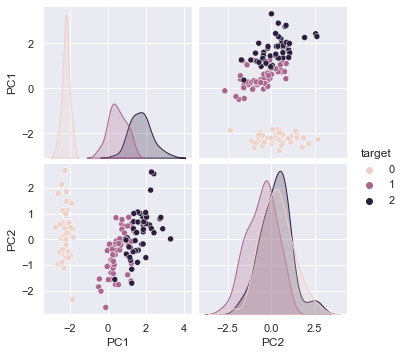

In [61]:
sns.pairplot(pca_iris_df, hue='target')

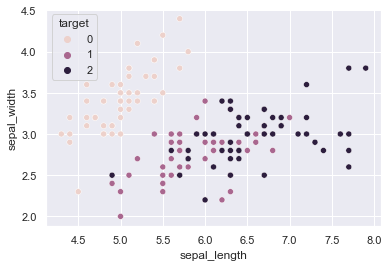

In [71]:
sns.scatterplot(data=iris_df, x="sepal_length", y="sepal_width", hue="target")

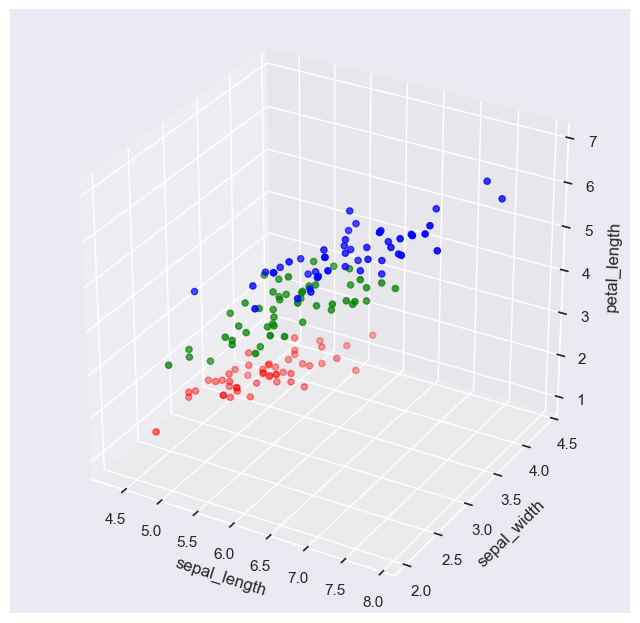

In [72]:
sns.set(style = "darkgrid")

fig=plt.figure(figsize=(8,8), dpi= 100, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, projection = '3d')

ax.set_xlabel("sepal_length")
ax.set_ylabel("sepal_width")
ax.set_zlabel("petal_length")

colors = {0:'red', 1:'green', 2:'blue'}
ax.scatter(iris_df.sepal_length,iris_df.sepal_width, iris_df.petal_length, c=iris_df.target.map(colors))

plt.show()


In [63]:
def euclideanDistance( d1, d2):
    dist = 0
    if len(d1) != len(d2):
        raise
    for i in range(len(d1)):
        dist = dist+np.square(d1[i]- d2[i])
                   
    return np.sqrt(dist)
                   
euclideanDistance(iris_df.sepal_length, iris_df.sepal_width)

36.1578483873142

### dot product

In [75]:
np.dot(iris_df.sepal_length, iris_df.sepal_width)

2673.43

## Norm

In [76]:
np.linalg.norm(iris_df.sepal_length)

72.27620631992247